## Titanic Corelation Statistics and Hypothesis Analysis part-2

In [2]:
# importing nessacry libraries

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # setting the visual style "whitegrid" adds a white background with grid lines.

# Loading the dataset ( train.xlxs is the titanic dataset)
df = pd.read_excel("train.xlsx")

# Striping column names and triming strings
df.columns = df.columns.str.strip()
for col in ["Name", "Sex", "Embarked", "Cabin", "Ticket"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# integer types (assigning) datatypes
df["Survived"] = df["Survived"].astype(int)
df["Pclass"]   = df["Pclass"].astype(int)

# Handleing Embarked ( by mode) and Age ( by median for Sex & Pclass)
if df["Embarked"].isna().any():
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

df["Age"] = df.groupby(["Sex", "Pclass"])["Age"].transform(lambda s: s.fillna(s.median()))

# Extracting Title from Name for categorical analysis
df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.", expand=False).str.strip()

#  checking
print("Rows:", len(df))
print(df[["Survived","Pclass","Sex","Age","Fare","Embarked","Title"]].head())

Rows: 891
   Survived  Pclass     Sex   Age     Fare Embarked Title
0         0       3    male  22.0   7.2500        S    Mr
1         1       1  female  38.0  71.2833        C   Mrs
2         1       3  female  26.0   7.9250        S  Miss
3         1       1  female  35.0  53.1000        S   Mrs
4         0       3    male  35.0   8.0500        S    Mr


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int32  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int32(2), int64(3), object(6)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,Mr



Age: mean, median, mode
- Mean   : 29.11
- Median : 26.00
- Mode   : 25.00

Fare: range, variance, standard deviation
- Range  : 512.33 (min=0.00, max=512.33)
- Variance: 2469.44
- Std dev : 49.69

Correlation
- Corr(Age, Fare): 0.1227

Quartiles
Age  quartiles (25%, 50%, 75%): [21.5 26.  36. ]
Fare quartiles (25%, 50%, 75%): [ 7.91 14.45 31.  ]


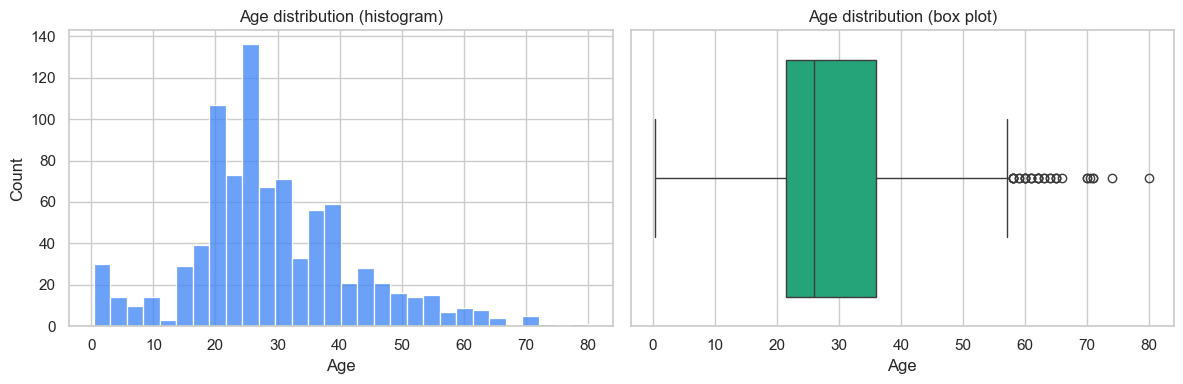


Pclass frequency
Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Survived percentage distribution
Survived
0    61.62
1    38.38
Name: proportion, dtype: float64

Passenger Title
- Mode title: Mr
Title percentage distribution (top 10):
Title
Mr              58.02
Miss            20.43
Mrs             14.03
Master           4.49
Dr               0.79
Rev              0.67
Mlle             0.22
Major            0.22
Col              0.22
the Countess     0.11
Name: proportion, dtype: float64


In [4]:
# --- Age  ---
age_mean   = df["Age"].mean()
age_median = df["Age"].median()
age_mode_s = df["Age"].mode()
age_mode   = age_mode_s.iloc[0] if len(age_mode_s) else np.nan

print("\nAge: mean, median, mode")
print(f"- Mean   : {age_mean:.2f}")
print(f"- Median : {age_median:.2f}")
print(f"- Mode   : {age_mode:.2f}")

# --- Fare  ---
fare_min = df["Fare"].min()
fare_max = df["Fare"].max()
fare_range = fare_max - fare_min
fare_var = df["Fare"].var(ddof=1)
fare_std = df["Fare"].std(ddof=1)

print("\nFare: range, variance, standard deviation")
print(f"- Range  : {fare_range:.2f} (min={fare_min:.2f}, max={fare_max:.2f})")
print(f"- Variance: {fare_var:.2f}")
print(f"- Std dev : {fare_std:.2f}")

# --- Correlation Age vs Fare ---
corr_age_fare = df[["Age","Fare"]].corr().loc["Age","Fare"]
print("\nCorrelation")
print(f"- Corr(Age, Fare): {corr_age_fare:.4f}")

# --- Quartiles (Age, Fare) ---
age_q = df["Age"].quantile([0.25, 0.5, 0.75])
fare_q = df["Fare"].quantile([0.25, 0.5, 0.75])
print("\nQuartiles")
print("Age  quartiles (25%, 50%, 75%):", age_q.values.round(2))
print("Fare quartiles (25%, 50%, 75%):", fare_q.values.round(2))

# --- Age histogram and box plot ---
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df["Age"], bins=30, kde=False, ax=ax[0], color="#3b82f6") # color is ( #3b82f6 ) blue 
ax[0].set_title("Age distribution (histogram)")
ax[0].set_xlabel("Age"); ax[0].set_ylabel("Count")

sns.boxplot(x=df["Age"], ax=ax[1], color="#10b981")  # color is ( #10b981 ) green 
ax[1].set_title("Age distribution (box plot)")
ax[1].set_xlabel("Age")
plt.tight_layout()
plt.show()

# --- Categorical analysis ---
# Pclass frequency
pclass_freq = df["Pclass"].value_counts().sort_index()
print("\nPclass frequency")
print(pclass_freq)

# Survived percentage
surv_pct = df["Survived"].value_counts(normalize=True).sort_index() * 100
print("\nSurvived percentage distribution")
print(surv_pct.round(2))

# Title mode and distribution
title_mode_s = df["Title"].mode()
title_mode = title_mode_s.iloc[0] if len(title_mode_s) else np.nan
title_pct = df["Title"].value_counts(normalize=True) * 100

print("\nPassenger Title")
print(f"- Mode title: {title_mode}")
print("Title percentage distribution (top 10):")
print(title_pct.head(10).round(2))

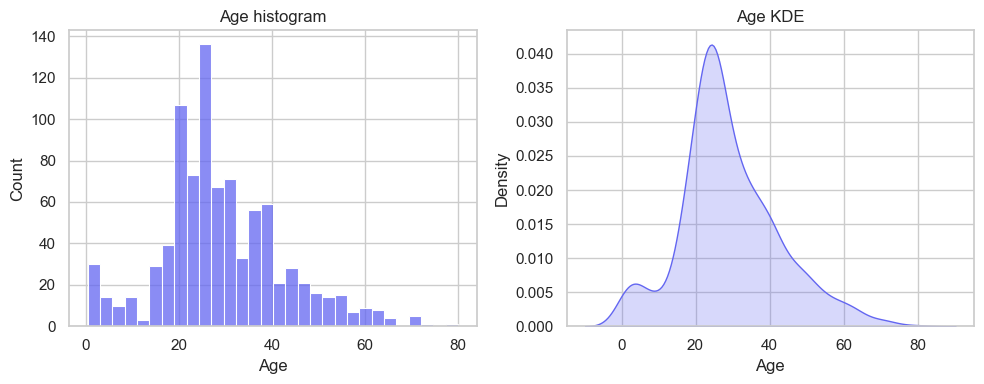

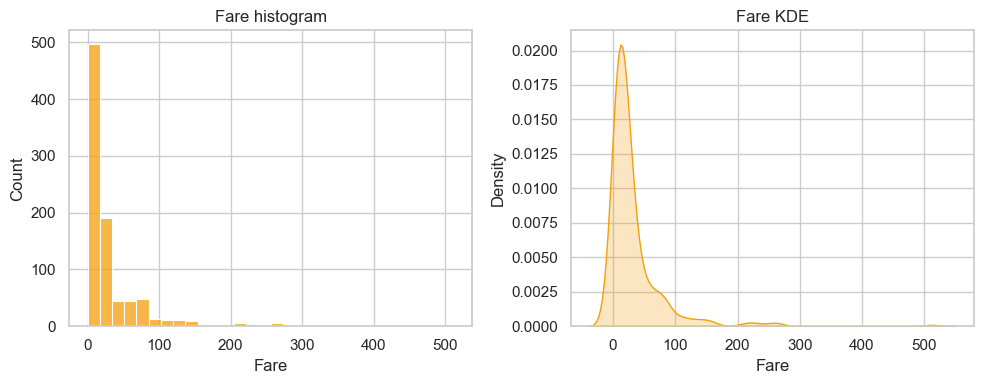

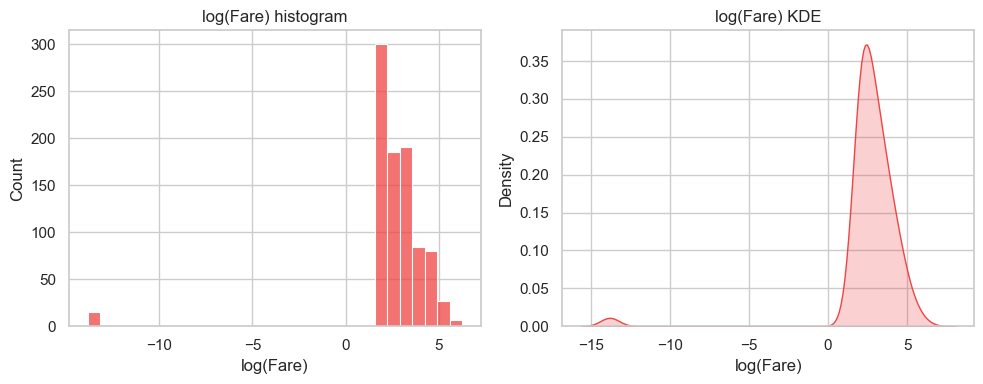

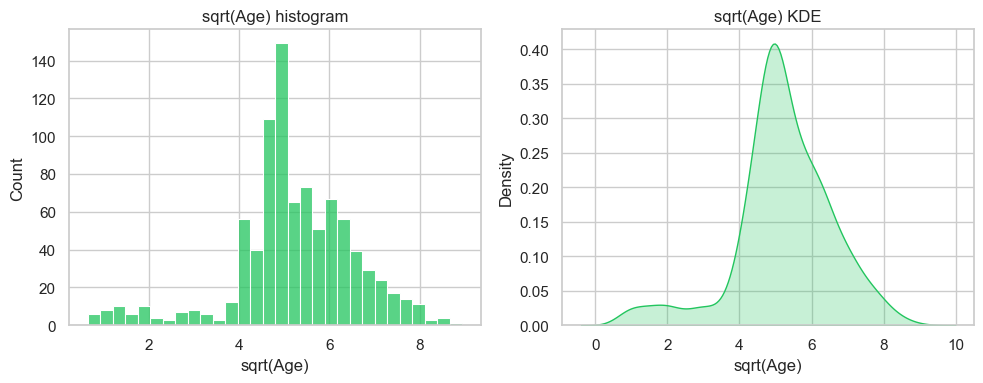

In [5]:
# Age distribution: histogram + KDE
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df["Age"], bins=30, kde=False, color="#6366f1")
plt.title("Age histogram")
plt.xlabel("Age"); plt.ylabel("Count")

plt.subplot(1,2,2)
sns.kdeplot(df["Age"], fill=True, color="#6366f1")
plt.title("Age KDE")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

# Fare distribution: histogram + KDE 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df["Fare"], bins=30, kde=False, color="#f59e0b")
plt.title("Fare histogram")
plt.xlabel("Fare"); plt.ylabel("Count")

plt.subplot(1,2,2)
sns.kdeplot(df["Fare"], fill=True, color="#f59e0b")
plt.title("Fare KDE")
plt.xlabel("Fare")
plt.tight_layout()
plt.show()

# Transformations
# Log(Fare) – add small epsilon to handle zeros
eps = 1e-6
df["Fare_log"] = np.log(df["Fare"] + eps)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df["Fare_log"], bins=30, kde=False, color="#ef4444")
plt.title("log(Fare) histogram")
plt.xlabel("log(Fare)"); plt.ylabel("Count")

plt.subplot(1,2,2)
sns.kdeplot(df["Fare_log"], fill=True, color="#ef4444")
plt.title("log(Fare) KDE")
plt.xlabel("log(Fare)")
plt.tight_layout()
plt.show()

# Sqrt(Age)
df["Age_sqrt"] = np.sqrt(df["Age"])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df["Age_sqrt"], bins=30, kde=False, color="#22c55e")
plt.title("sqrt(Age) histogram")
plt.xlabel("sqrt(Age)"); plt.ylabel("Count")

plt.subplot(1,2,2)
sns.kdeplot(df["Age_sqrt"], fill=True, color="#22c55e")
plt.title("sqrt(Age) KDE")
plt.xlabel("sqrt(Age)")
plt.tight_layout()
plt.show()

In [6]:
# Population mean age (post-imputation)
pop_mean_age = df["Age"].mean()
print(f"\nPopulation mean Age (cleaned): {pop_mean_age:.3f}")

# a) One sample of n=200 with 95% CI (t-interval)

np.random.seed(42)
sample = df["Age"].sample(n=200, replace=False, random_state=42)
n = len(sample)
xbar = sample.mean()
s = sample.std(ddof=1)
alpha = 0.05  # For 95% CI (1 - alpha)
tcrit = stats.t.ppf(1 - alpha/2, df=n-1)
ci_age = (xbar - tcrit * s/np.sqrt(n), xbar + tcrit * s/np.sqrt(n))
print(f"One-sample 95% CI for mean Age (n=200): ({ci_age[0]:.3f}, {ci_age[1]:.3f})")

# b) Repeat many times and compute coverage (bootstrap simulation)

B = 1000  # number of times to repeat the process—1000
covers = 0
for b in range(B):
    smp = df["Age"].sample(n=200, replace=True, random_state=42+b)
    n_b = len(smp)
    xbar_b = smp.mean()
    s_b = smp.std(ddof=1)
    tcrit_b = stats.t.ppf(1 - alpha/2, df=n_b-1)
    ci_b = (xbar_b - tcrit_b * s_b/np.sqrt(n_b), xbar_b + tcrit_b * s_b/np.sqrt(n_b))
    covers += (ci_b[0] <= pop_mean_age <= ci_b[1])

coverage = covers / B
print(f"Coverage over {B} resamples: {coverage*100:.2f}%")


Population mean Age (cleaned): 29.112
One-sample 95% CI for mean Age (n=200): (28.100, 31.778)
Coverage over 1000 resamples: 95.00%


In [7]:
fare_skew = stats.skew(df["Fare"], bias=False)
fare_kurt = stats.kurtosis(df["Fare"], fisher=True, bias=False)  # excess kurtosis
print("\nFare shape")
print(f"- Skewness         : {fare_skew:.3f}")
print(f"- Excess kurtosis  : {fare_kurt:.3f}")


Fare shape
- Skewness         : 4.787
- Excess kurtosis  : 33.398


In [8]:
# 95% CI for mean Fare (t-interval)
fare_mean = df["Fare"].mean()
fare_sd   = df["Fare"].std(ddof=1)
n_fare    = df["Fare"].notna().sum()
tcrit_fare = stats.t.ppf(0.975, df=n_fare-1)
ci_fare = (fare_mean - tcrit_fare * fare_sd/np.sqrt(n_fare),
           fare_mean + tcrit_fare * fare_sd/np.sqrt(n_fare))
print(f"\n95% CI for mean Fare: ({ci_fare[0]:.3f}, {ci_fare[1]:.3f})")

# 95% CI for survivor proportion — Wilson interval (robust)
k = df["Survived"].sum()
n = len(df)
phat = k / n
z = stats.norm.ppf(0.975)
den = 1 + z**2/n
centre = phat + z**2/(2*n)
rad = z*np.sqrt((phat*(1-phat) + z**2/(4*n))/n)
ci_prop = ((centre - rad)/den, (centre + rad)/den)

print(f"Survivor proportion (phat): {phat:.4f}  (k={k}, n={n})")
print(f"95% CI for survivor proportion (Wilson): ({ci_prop[0]:.4f}, {ci_prop[1]:.4f})")


95% CI for mean Fare: (28.937, 35.472)
Survivor proportion (phat): 0.3838  (k=342, n=891)
95% CI for survivor proportion (Wilson): (0.3525, 0.4162)


## Conclusion :



- **Both Age and Fare data are highly skewed:** The skewness and kurtosis statistics for Fare show a strong right skew and very heavy tails, indicating outliers and a non-normal distribution; Age may have similar features.

- **Transformation improves visualization and analysis:** Log and square root transformations (for Fare and Age) help correct skewness, making distributions more normal-like and suitable for statistical analysis.

- **Kernel Density Estimation (KDE) provides a clearer view of distributions:** KDE plots reveal the smoothed shape of data, highlighting peaks and modes that may be missed in histograms alone.

- **95% confidence intervals were calculated robustly:** For both mean Fare and survivor proportion, correct statistical intervals (t-interval for mean, Wilson interval for proportion) were used, reflecting valid uncertainty about estimates.

- **Survivor proportion is estimated at approximately 38.4%:** The Wilson interval suggests the true survival rate was likely between 35.2% and 41.6%, providing a reliable estimate for binomial proportions.

- **Bootstrapping demonstrates good coverage of CIs:** Repeated sampling with confidence interval calculations empirically showed that the computed intervals capture the true mean at approximately the stated confidence level, confirming the effectiveness of the statistical methods.


